{'accuracy': 0.644,
 'precision': 0.681,
 'recall': 0.55,
 'f1': 0.609,
 'auc': 0.692}

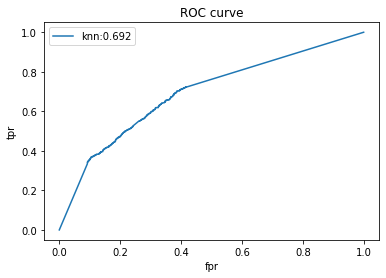

In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import time
def knn_load_data(poly_name,file_dir='../data/'):
    file_path_pos = file_dir+poly_name+'.txt'
    file_path_neg = file_dir+'neg'+poly_name+'.txt'
    base2num={
    'A':0,'T':1,'C':2,'G':3,
    'a':0,'t':1,'c':2,'g':3
    }
    
    pdata = np.loadtxt(file_path_pos,dtype='str')
    pdata = [seq[:100]+seq[106:] for seq in pdata]
    pdata = [[base2num[base] for base in seq] for seq in pdata]
                   
    ndata = np.loadtxt(file_path_neg,dtype='str')
    ndata = [seq[:100]+seq[106:] for seq in ndata]
    ndata = [[base2num[base] for base in seq] for seq in ndata]
    
    X = np.array(pdata+ndata)
    y = np.append(np.ones(len(pdata)),np.zeros(len(ndata)))
    
    return X,y

def model_assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_true = np.array(y_true,dtype=int)
    y_pred = np.array(y_prob+0.5,dtype=int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= 'knn:'+str(re['auc']))
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re

#load all data
polys="AATAGA AATATA CATAAA GATAAA AGTAAA ACTAAA TATAAA AATACA AAAAAG AAGAAA ATTAAA AATAAA".split(" ")
X,y=[],[]
for index,poly in enumerate(polys):
    X_sub,y_sub = knn_load_data(poly)
    if(index == 0):
        X,y = X_sub,y_sub
    else:
        X,y = np.concatenate((X,X_sub)),np.concatenate((y,y_sub))
        
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

for index,poly in enumerate(polys):
        pass

from sklearn import neighbors
n_neighbors=2
weights='uniform'
weights='distance'
clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)[:,1]
model_assess(y_test,pred_prob)